<a href="https://colab.research.google.com/github/Arman3875/Heart-Failure-Clinical-Records-/blob/main/Classification_Model_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

### 2. Data Visualization
- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

---

## Submission Instructions:
- Submit your notebook file to github with the completed analysis.
- Ensure that the notebook is well-documented with explanations for each step.
- Include visualizations and comments on the results of each model.
- Submit github link only


# Heart Failure Prediction Assignment

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# 1.Data Exploration (EDA)

**Task 1: Load the dataset using pandas and display the first few rows.**

In [ ]:
df=pd.read_csv("/content/heart failure.csv.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.shape

(299, 13)

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**Task 2: Check for missing values and clean the data if necessary.**

In [ ]:
missing_values = df.isnull().sum()
print("Missing Value of the Data set \n" )
print(missing_values)

Missing Value of the Data set 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Task 3: Generate summary statistics for the numerical columns.**

In [ ]:
summary_statistics = df.describe()
print("Summary Statistics of the Data set \n" )
print(summary_statistics)

Summary Statistics of the Data set 

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%

**Task 4: Visualize the distribution of the target variable (DEATH_EVENT).**

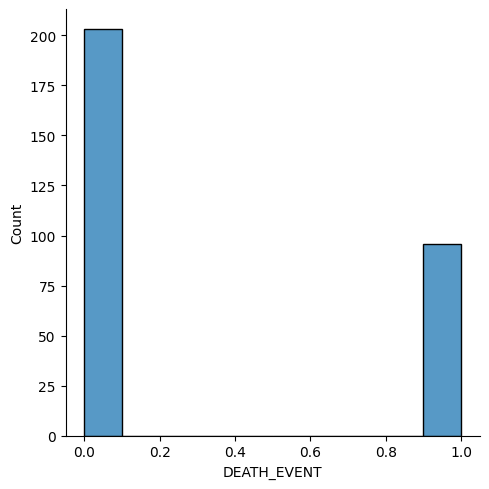

In [ ]:
sns.displot(df['DEATH_EVENT'])
plt.show()


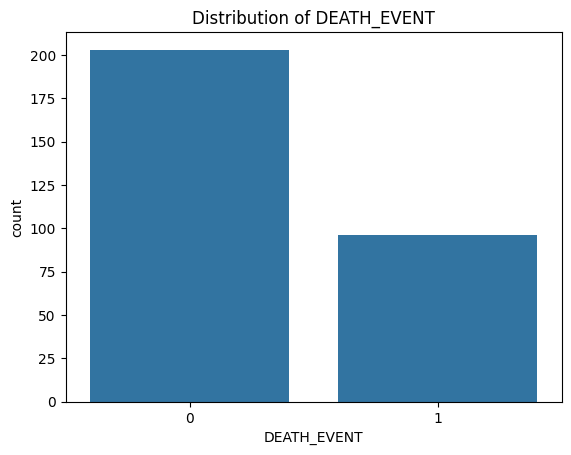

In [ ]:
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of DEATH_EVENT')
plt.show()

In [ ]:
df['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


**Task 5: Plot histograms or box plots for continuous variables**

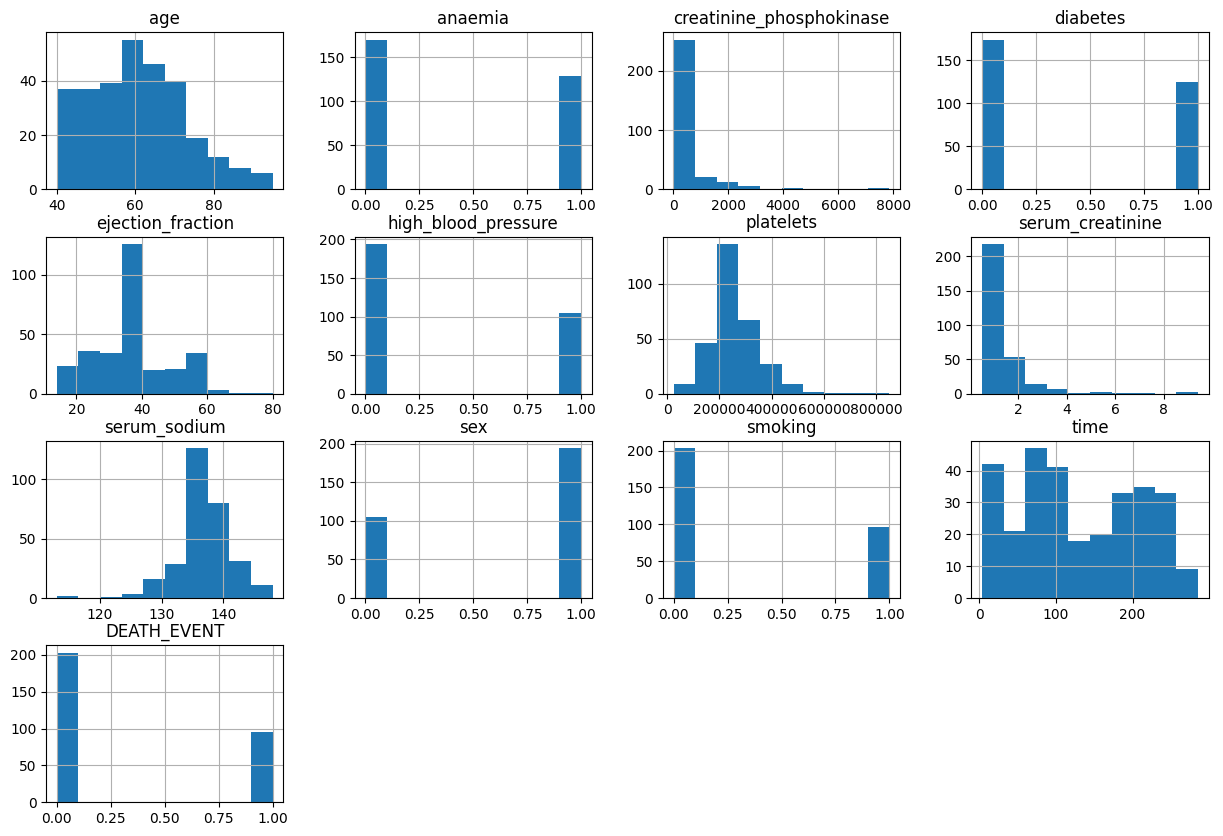

In [ ]:
df.hist(figsize=(15,10))
plt.show()

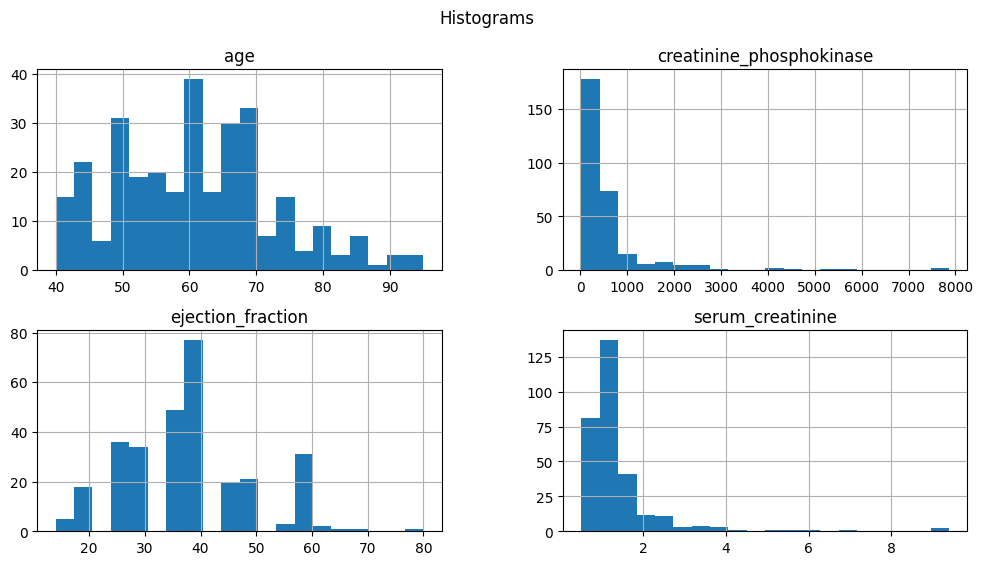

In [ ]:
df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine']].hist(bins=20, figsize=(12,6))
plt.suptitle('Histograms')
plt.show()

Box Plot

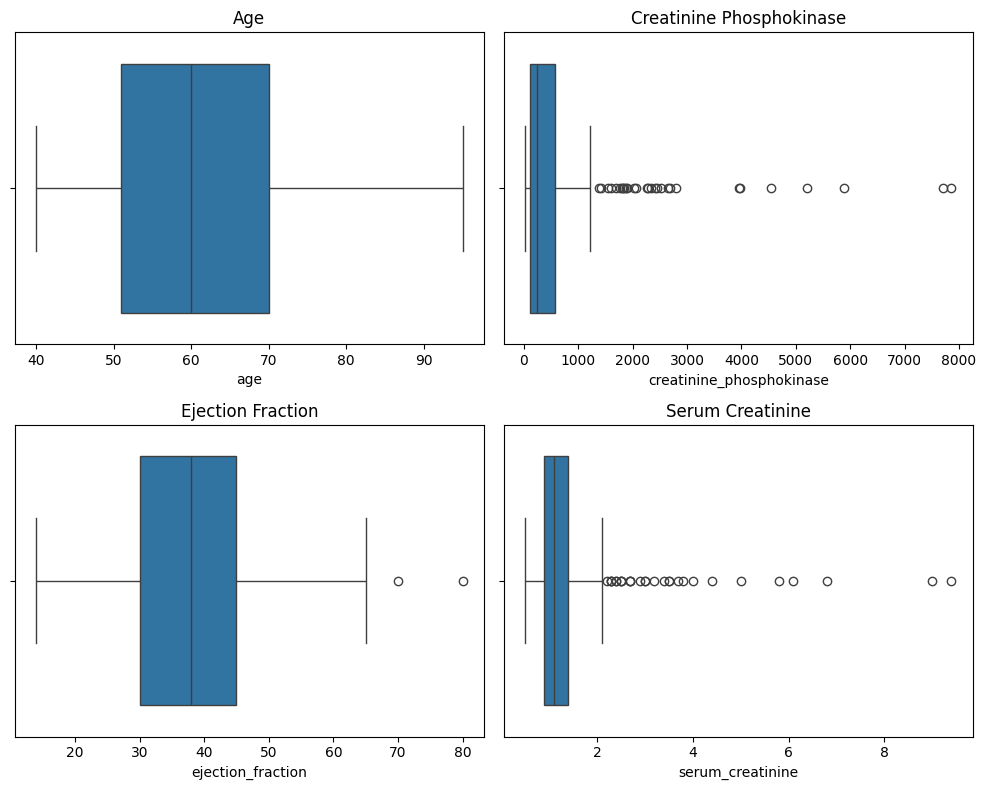

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(x=df['age'], ax=axs[0, 0])
axs[0, 0].set_title('Age')

sns.boxplot(x=df['creatinine_phosphokinase'], ax=axs[0, 1])
axs[0, 1].set_title('Creatinine Phosphokinase')

sns.boxplot(x=df['ejection_fraction'], ax=axs[1, 0])
axs[1, 0].set_title('Ejection Fraction')

sns.boxplot(x=df['serum_creatinine'], ax=axs[1, 1])
axs[1, 1].set_title('Serum Creatinine')

plt.tight_layout()
plt.show()

In [ ]:
df[['serum_creatinine', 'creatinine_phosphokinase']].describe()

,serum_creatinine,creatinine_phosphokinase
count,299.00000,299.000000
mean,1.39388,581.839465
std,1.03451,970.287881
min,0.50000,23.000000
25%,0.90000,116.500000
50%,1.10000,250.000000
75%,1.40000,582.000000
max,9.40000,7861.000000


# 2. **Data Visualization**

**Task 6: Create a correlation matrix heatmap to understand the relationships between the features.**

In [ ]:
correlation_matrix = df.corr()
print("  correlation_matrix \n ")
print(correlation_matrix)

  correlation_matrix 
 
                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT   

In [ ]:
Death_event_corr = df.corr()['DEATH_EVENT']
Death_event_corr = Death_event_corr.sort_values(ascending=False)
print("  Death_event_corr \n ")
print(Death_event_corr)

  Death_event_corr 
 
DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


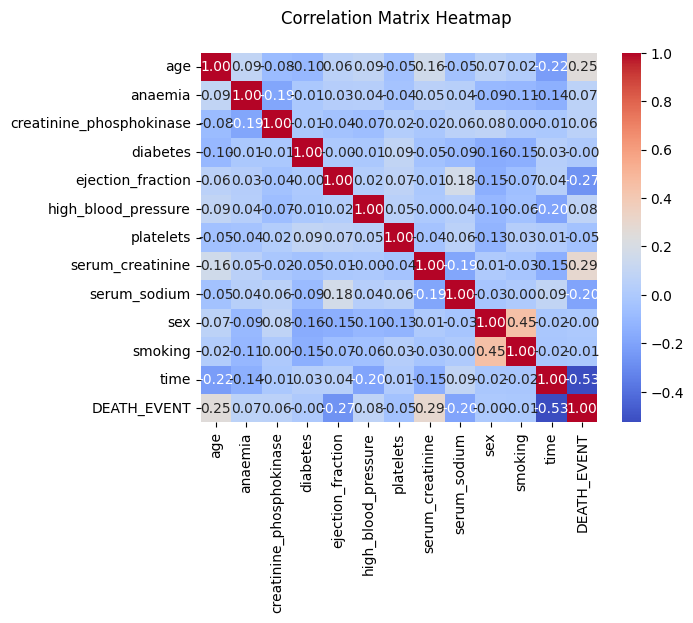

<Figure size 2000x1000 with 0 Axes>

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap \n')
plt.figure(figsize=(20,10))
plt.show()

**Task 7: Create count plots or bar charts for categorical variables like anaemia, diabetes, high_blood_pressure, sex, and smoking.**

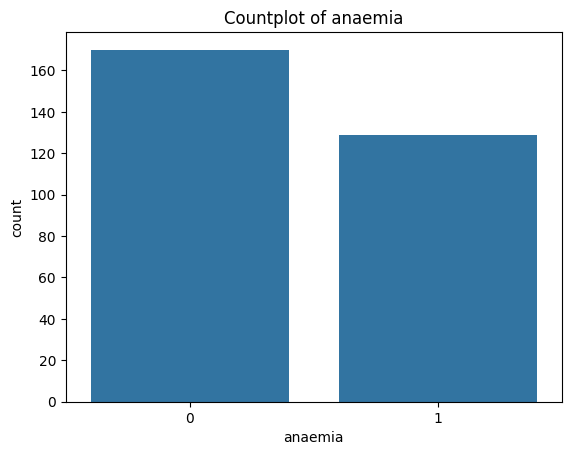

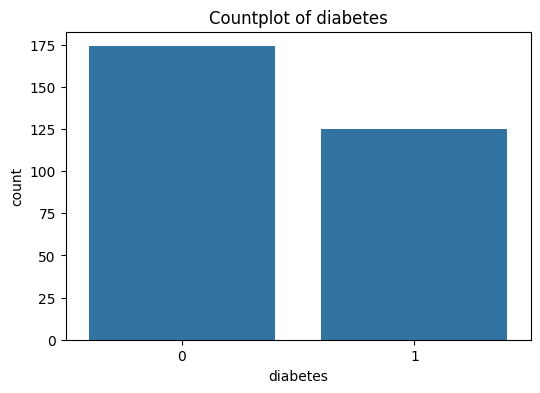

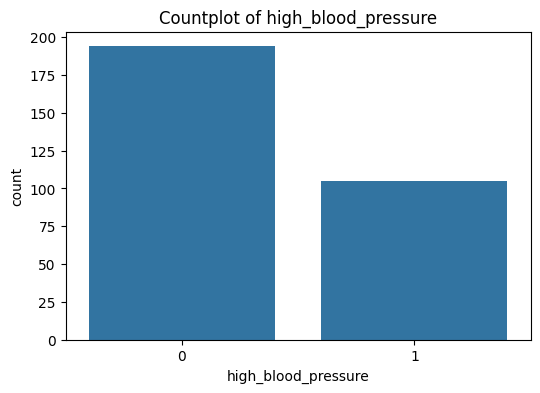

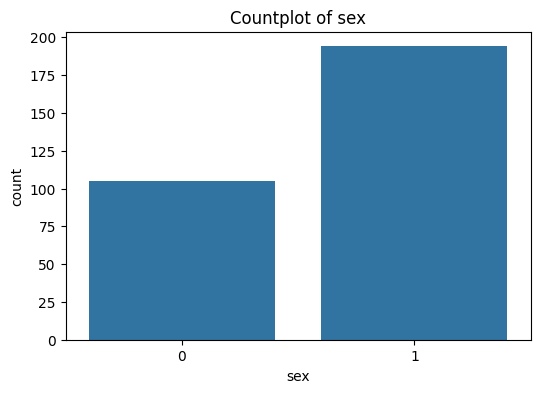

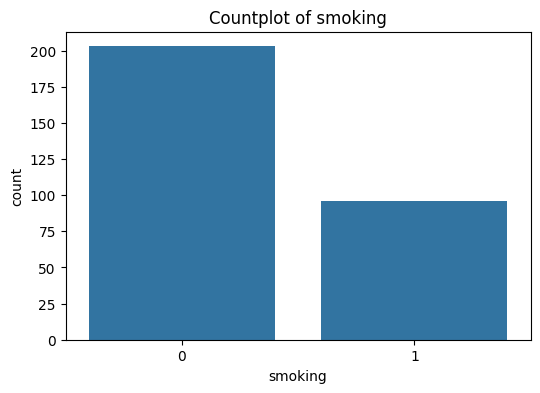

<Figure size 600x400 with 0 Axes>

In [ ]:

features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for feature in features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Countplot of {feature}')
    plt.figure(figsize=(6,4))


**Task 8: Create scatter plots or pair plots for continuous variables like age vs ejection_fraction, serum_creatinine, etc., colored by DEATH_EVENT.**

In [ ]:
#sns.pairplot(df, hue='DEATH_EVENT')
#plt.show()

In [ ]:
#continuous_vars = ['age', 'ejection_fraction', 'serum_creatinine', 'time','serum_sodium','platelets','creatinine_phosphokinase']

#sns.pairplot(df, hue='DEATH_EVENT', vars=continuous_vars)
#plt.show()

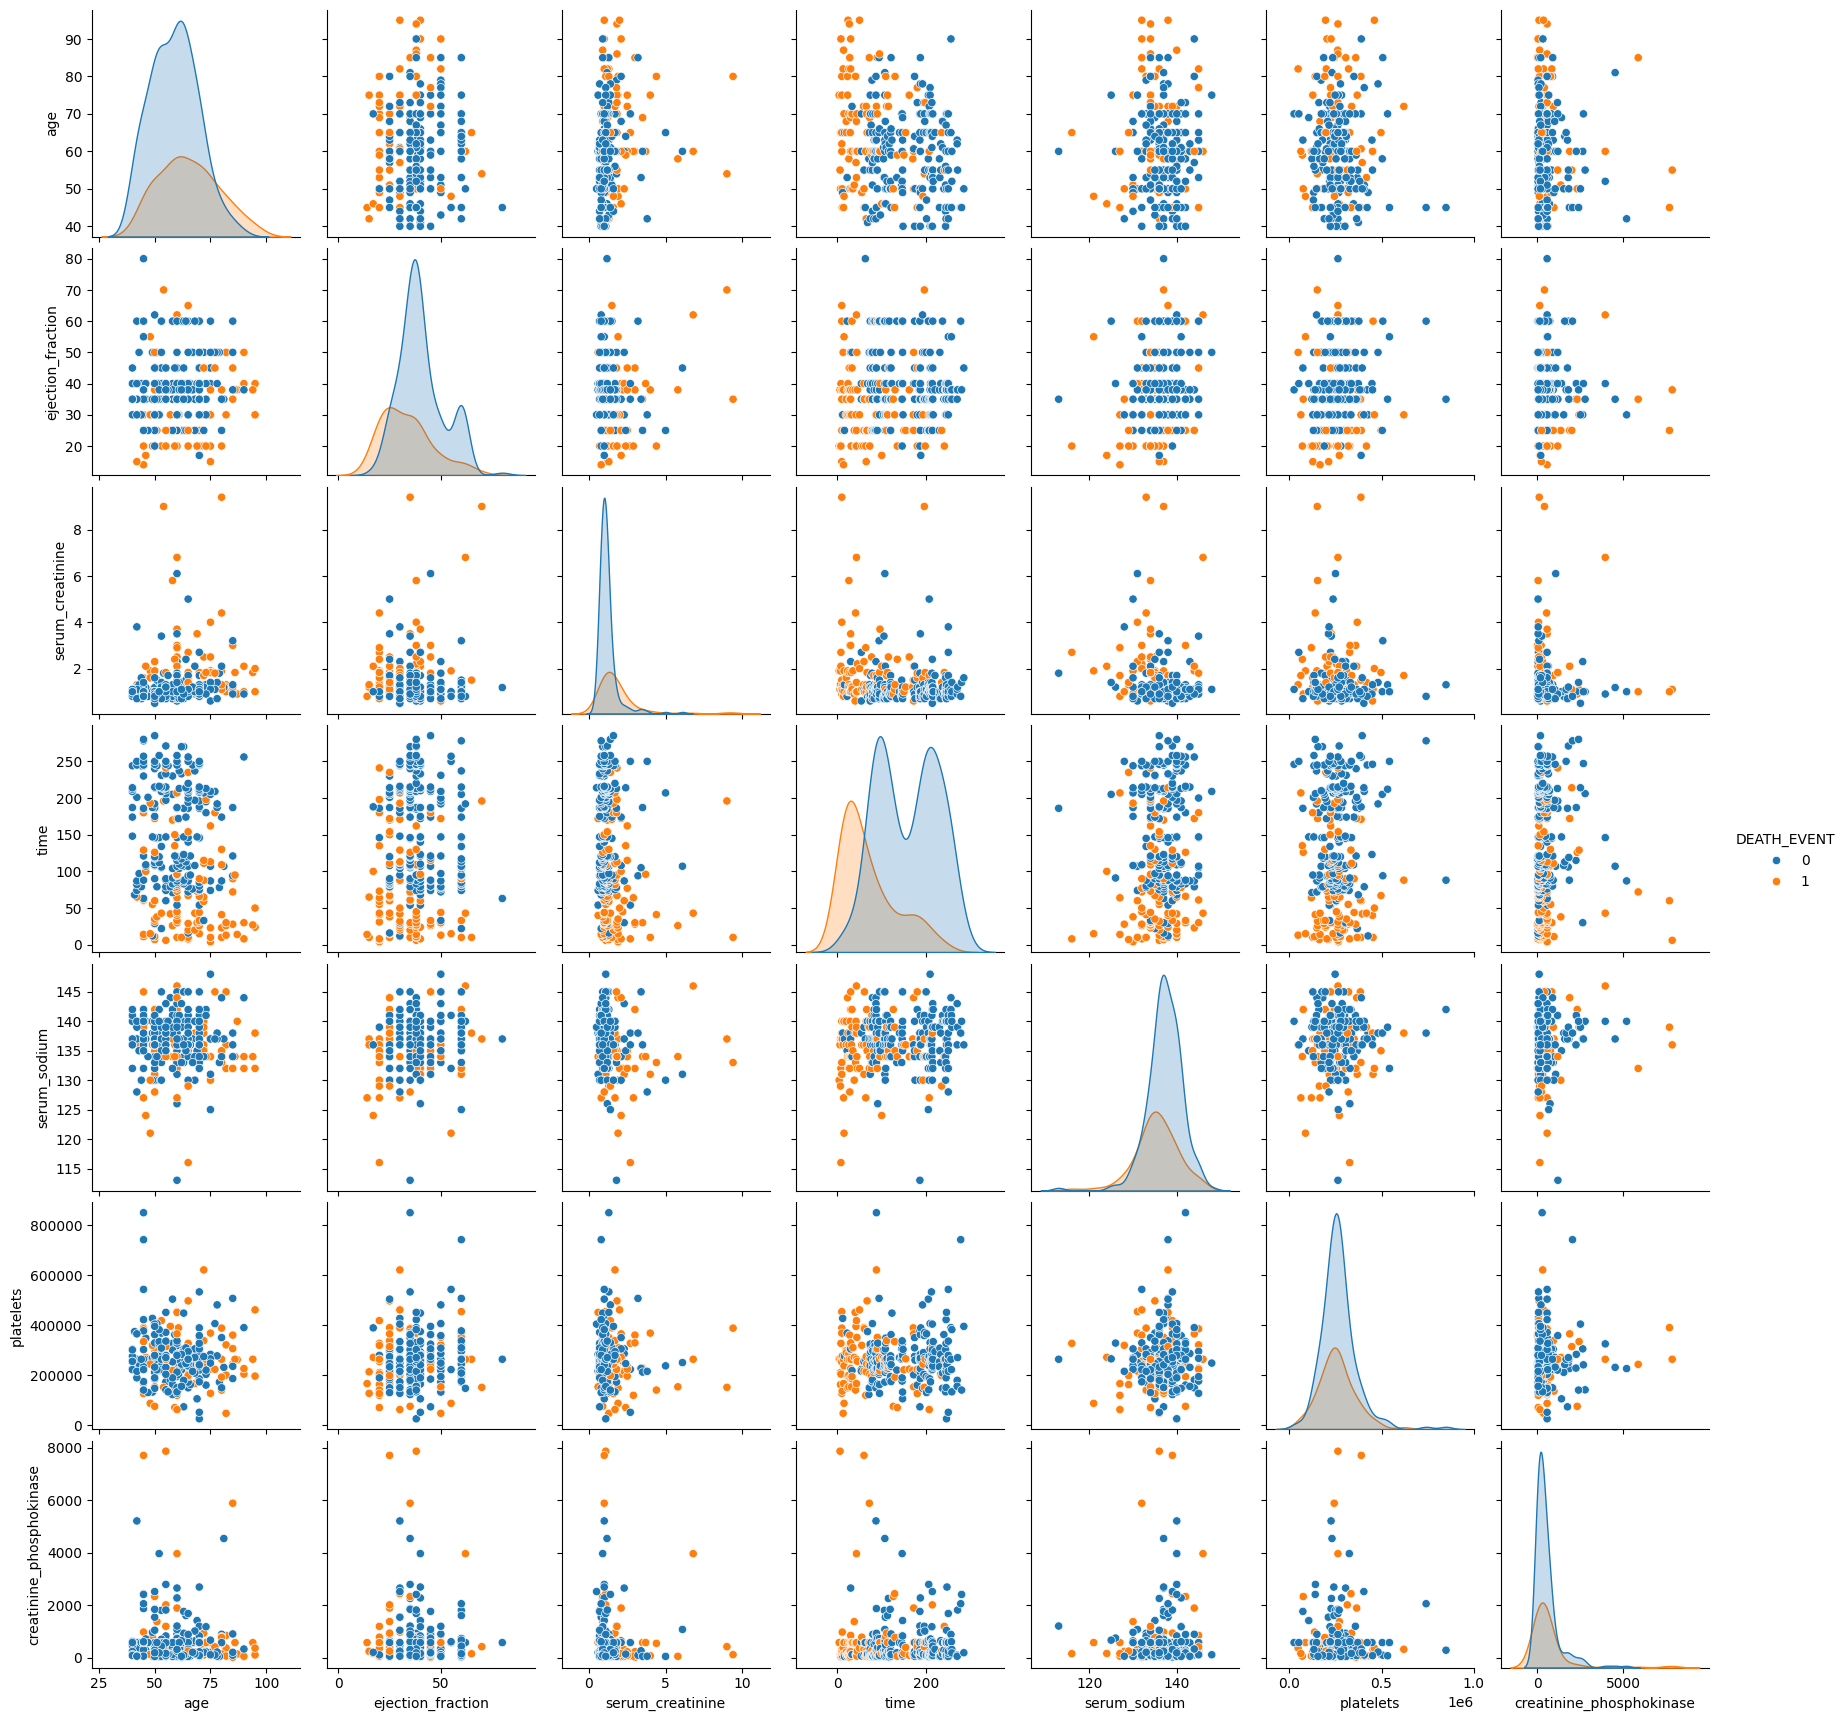

In [ ]:
continuous_vars = ['age', 'ejection_fraction', 'serum_creatinine', 'time','serum_sodium','platelets','creatinine_phosphokinase']

sns.pairplot(df[continuous_vars + ['DEATH_EVENT']], hue='DEATH_EVENT')
plt.show()

# 3. Model Building

**Task 9: Split the dataset into features (X) and the target variable (y = DEATH_EVENT).**

In [ ]:
features_x=df.drop('DEATH_EVENT',axis=1)
target_y=df['DEATH_EVENT']
print(features_x.shape)
print(target_y.shape)

(299, 12)
(299,)


In [ ]:

target_y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [ ]:
features_x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


**Task 10: Perform train-test splitting (70% training, 30% testing) using train_test_split from sklearn.**

In [ ]:
from sklearn.model_selection import train_test_split

features_x_train, features_x_test, target_y_train, target_y_test = train_test_split(features_x, target_y, test_size=0.3, random_state=42)


**Task 11: Standardize the continuous features using StandardScaler.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
features_x_train[continuous_vars] = scaler.fit_transform(features_x_train[continuous_vars])
features_x_test[continuous_vars] = scaler.transform(features_x_test[continuous_vars])



# 4.Model Training and Evaluation


**Task 12: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
model = LogisticRegression()
model.fit(features_x_train, target_y_train)

target_y_pred = model.predict(features_x_test)

# Evaluate the model
accuracy = accuracy_score(target_y_test, target_y_pred)
precision = precision_score(target_y_test, target_y_pred)
recall = recall_score(target_y_test, target_y_pred)
f1 = f1_score(target_y_test, target_y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7888888888888889
Precision: 0.875
Recall: 0.5675675675675675
F1 Score: 0.6885245901639344


**Task 13: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features_x_train, target_y_train)

# Step 4: Make predictions
y_pred = knn_model.predict(features_x_test)

# Evaluate the model
accuracy = accuracy_score(target_y_test, y_pred)
precision = precision_score(target_y_test, y_pred)
recall = recall_score(target_y_test, y_pred)
f1 = f1_score(target_y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7222222222222222
Precision: 0.875
Recall: 0.3783783783783784
F1 Score: 0.5283018867924528


**Task 14: Train a Decision Tree Classifier and compare its performance with other models.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(features_x_train, target_y_train)
target_y_pred_tree = decision_tree_model.predict(features_x_test)
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(features_x_train,target_y_train)
target_y_pred_tree = decision_tree_model.predict(features_x_test)


In [ ]:


# Evaluate the Decision Tree model
accuracy = accuracy_score(target_y_test, target_y_pred_tree)
precision = precision_score(target_y_test, target_y_pred_tree)
recall = recall_score(target_y_test, target_y_pred_tree)
f1 = f1_score(target_y_test, target_y_pred_tree)

# Print evaluation results
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Decision Tree Classifier Performance:
Accuracy: 0.6777777777777778
Precision: 0.6333333333333333
Recall: 0.5135135135135135
F1 Score: 0.5671641791044776


# 5. Cross Validation

**Task 15: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Perform 5-fold cross-validation
accuracy = cross_val_score(log_reg, features_x_train, target_y_train, cv=5, scoring='accuracy')
precision = cross_val_score(log_reg, features_x_train, target_y_train, cv=5, scoring='precision')
recall = cross_val_score(log_reg, features_x_train, target_y_train, cv=5, scoring='recall')
f1 = cross_val_score(log_reg, features_x_train, target_y_train, cv=5, scoring='f1')

# Print average scores
print(f'Average Accuracy: {accuracy.mean()}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-Score: {f1.mean()}')


Average Accuracy: 0.8276422764227643
Average Precision: 0.7619047619047619
Average Recall: 0.5924242424242424
Average F1-Score: 0.6584615384615385


**Task 16: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Stratified K-Fold Cross-Validation
strat_kfold = StratifiedKFold(n_splits=5)
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

for train_index, test_index in strat_kfold.split(features_x_train, target_y_train):
    X_train_fold, X_test_fold = features_x_train.iloc[train_index], features_x_train.iloc[test_index]
    y_train_fold, y_test_fold = target_y_train.iloc[train_index], target_y_train.iloc[test_index]

    # Train logistic regression on each fold
    log_reg.fit(X_train_fold, y_train_fold)
    y_pred = log_reg.predict(X_test_fold)

    # Calculate evaluation metrics
    accuracy_list.append(accuracy_score(y_test_fold, y_pred))
    precision_list.append(precision_score(y_test_fold, y_pred))
    recall_list.append(recall_score(y_test_fold, y_pred))
    f1_list.append(f1_score(y_test_fold, y_pred))

# Print average scores
print(f'Average Accuracy: {np.mean(accuracy_list)}')
print(f'Average Precision: {np.mean(precision_list)}')
print(f'Average Recall: {np.mean(recall_list)}')
print(f'Average F1-Score: {np.mean(f1_list)}')


Average Accuracy: 0.8276422764227643
Average Precision: 0.7619047619047619
Average Recall: 0.5924242424242424
Average F1-Score: 0.6584615384615385


# 6.Model Improvement

**Task 17: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV for KNN
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid=knn_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(features_x_train, target_y_train)

# Best parameters
print(f'Best KNN Parameters: {grid_search_knn.best_params_}')


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for Decision Tree
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid=dt_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_dt.fit(features_x_train, target_y_train)

# Best parameters
print(f'Best Decision Tree Parameters: {grid_search_dt.best_params_}')


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}


**Task 18: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.**

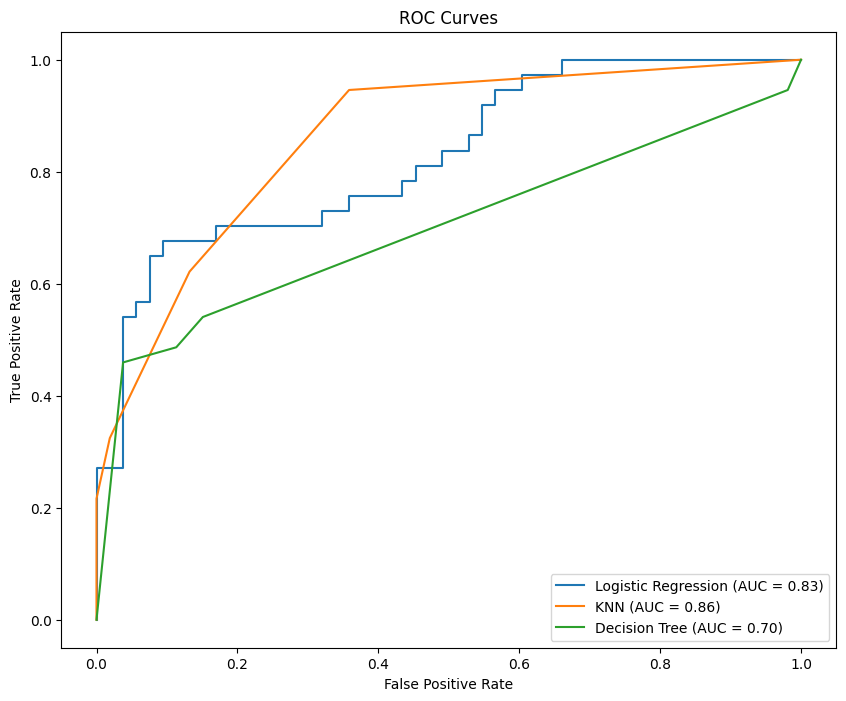

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression
log_reg_probs = log_reg.predict_proba(features_x_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(target_y_test, log_reg_probs)
auc_log = auc(fpr_log, tpr_log)

# KNN
knn_probs = grid_search_knn.predict_proba(features_x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(target_y_test, knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)

# Decision Tree
dt_probs = grid_search_dt.predict_proba(features_x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(target_y_test, dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


# 7.Conclusion

**Task 19: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.**

The best model K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model

   serum_creatinine  & age are the most important fearures for predicting the death event. the co-relation with death_event are 0.294278 & 0.253729 respectively.


**Task 20: Suggest potential improvements or next steps for the analysis.**




potential improvements or next steps for the analysis

Here, I can propose some ways to improve the model or the analysis. Examples include:
- Using more advanced models like Random Forest or XGBoost.
- Collecting more data or performing feature engineering.
- Addressing class imbalance with techniques like SMOTE (Synthetic Minority Over-sampling Technique).

#                                 Thanks